In [4]:
# Import libraries

import isx 
import os 
import numpy as np
from scipy.fft import fft, ifft 
from scipy.ndimage import gaussian_filter 
import matplotlib.pyplot as plt
import tifffile
from tqdm import tqdm
import time

In [5]:
notebook_path = os.getcwd()
print(notebook_path)

\\ocean.igf.internal\invivo\INSCOPIX\Ana


Data shape: (10806, 400, 640)


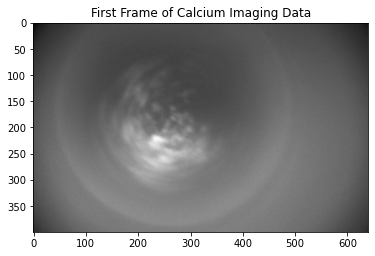

In [6]:

# Load the tiff stack
file_path = "December/AnaAquiles2024/PlaqueSouris5min/Processed/December/TiffFiles/December/Ana_training-Nov2024_2024-11-21-15-28-49_video--P.tif"
data = tifffile.imread(file_path)  # Shape: (T, X, Y) or (T, Z, X, Y) for volumetric

# Inspect the data
print(f"Data shape: {data.shape}")
plt.imshow(data[0], cmap='gray')  # Show the first frame
plt.title("First Frame of Calcium Imaging Data")
plt.show()

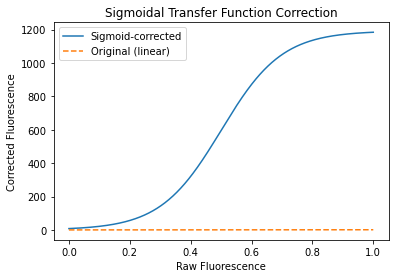

In [7]:
# Example: simulated fluorescence intensity data
raw_fluorescence = np.linspace(0, 1, 1000)  # normalized fluorescence, e.g., F/F0

# Sigmoidal correction parameters
L = 1192     # maximum value after correction
k = 10.0     # slope (steepness)
x0 = 0.5     # midpoint (where curve transitions most rapidly)

# Apply the sigmoidal correction
corrected_fluorescence = L / (1 + np.exp(-k * (raw_fluorescence - x0)))

# Plot to visualize correction
plt.figure(figsize=(6,4))
plt.plot(raw_fluorescence, corrected_fluorescence, label='Sigmoid-corrected')
plt.plot(raw_fluorescence, raw_fluorescence, '--', label='Original (linear)')
plt.xlabel("Raw Fluorescence")
plt.ylabel("Corrected Fluorescence")
plt.legend()
plt.title("Sigmoidal Transfer Function Correction")
plt.show()


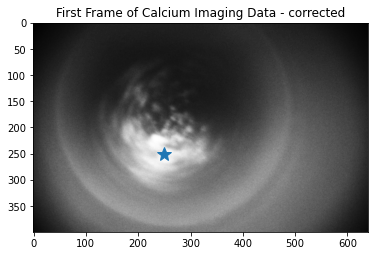

In [15]:


# Suppose you have fluorescence data from an image or time series
# e.g., loaded via tifffile, skimage, or numpy
fluorescence = data  # shape: (height, width) or (time,)

# Normalize before correction
fluorescence_norm = (fluorescence - np.min(fluorescence)) / (np.max(fluorescence) - np.min(fluorescence))

# Apply sigmoidal correction
L = 904
k = 10.0
x0 = 0.5
fluorescence_corrected = L / (1 + np.exp(-k * (fluorescence_norm - x0)))

# Optionally rescale back
fluorescence_corrected *= np.max(fluorescence)
plt.imshow(fluorescence_corrected[0], cmap='gray')  # Show the first frame
plt.plot(250,250,'*', markersize=15)
plt.title("First Frame of Calcium Imaging Data - corrected")
plt.show()

In [18]:
# tifffile.imwrite('FilmFilteredSIF.tif', fluorescence_corrected)

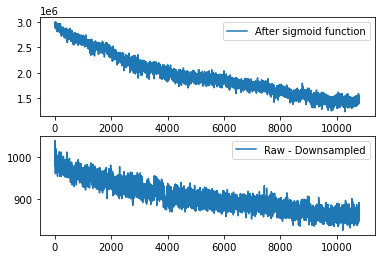

In [9]:
PixEx = fluorescence_corrected[:,250,250]
PixExRaw = data[:,50,250]

plt.figure()
plt.subplot(211)
plt.plot(PixEx, label='After sigmoid function') 
plt.legend()
plt.subplot(212)
plt.plot(PixExRaw, label = 'Raw - Downsampled') 
plt.legend()

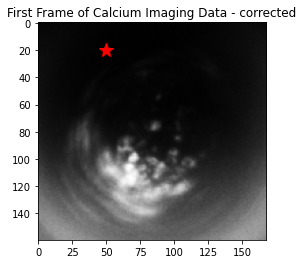

In [38]:
plt.imshow(fluorescence_corrected[0], cmap='gray')  # Show the first frame
plt.plot(50,20,'r*', markersize=15, )
plt.title("First Frame of Calcium Imaging Data - corrected")
plt.show()

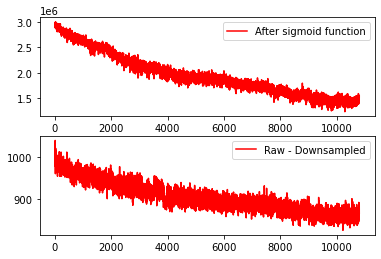

In [10]:
# Where is the BACKGROUND signal
PixEx1 = fluorescence_corrected[:,250,250]
PixExRaw1 = data[:,50,250]

plt.figure()
plt.subplot(211)
plt.plot(PixEx1,'r-', label='After sigmoid function' ) 
plt.legend()
plt.subplot(212)
plt.plot(PixExRaw1, 'r-', label = 'Raw - Downsampled')
plt.legend()

In [11]:
from scipy.optimize import curve_fit
##### recommended to first find the calibration values 

def sigmoid(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

# Suppose you have calibration data
x_measured = PixExRaw1  # measured fluorescence
y_true = PixExRaw      # true or reference fluorescence

params, _ = curve_fit(sigmoid, x_measured, y_true, p0=[1, 10, 0.5])
L_fit, k_fit, x0_fit = params


C:\Users\uid-1908\AppData\Local\miniconda3\envs\isxenv\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [12]:
L_fit

904.4029249878191

In [13]:
k_fit

10.0

In [14]:
x0_fit

0.5